In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/2023빅콘

/content/drive/MyDrive/Colab Notebooks/2023빅콘


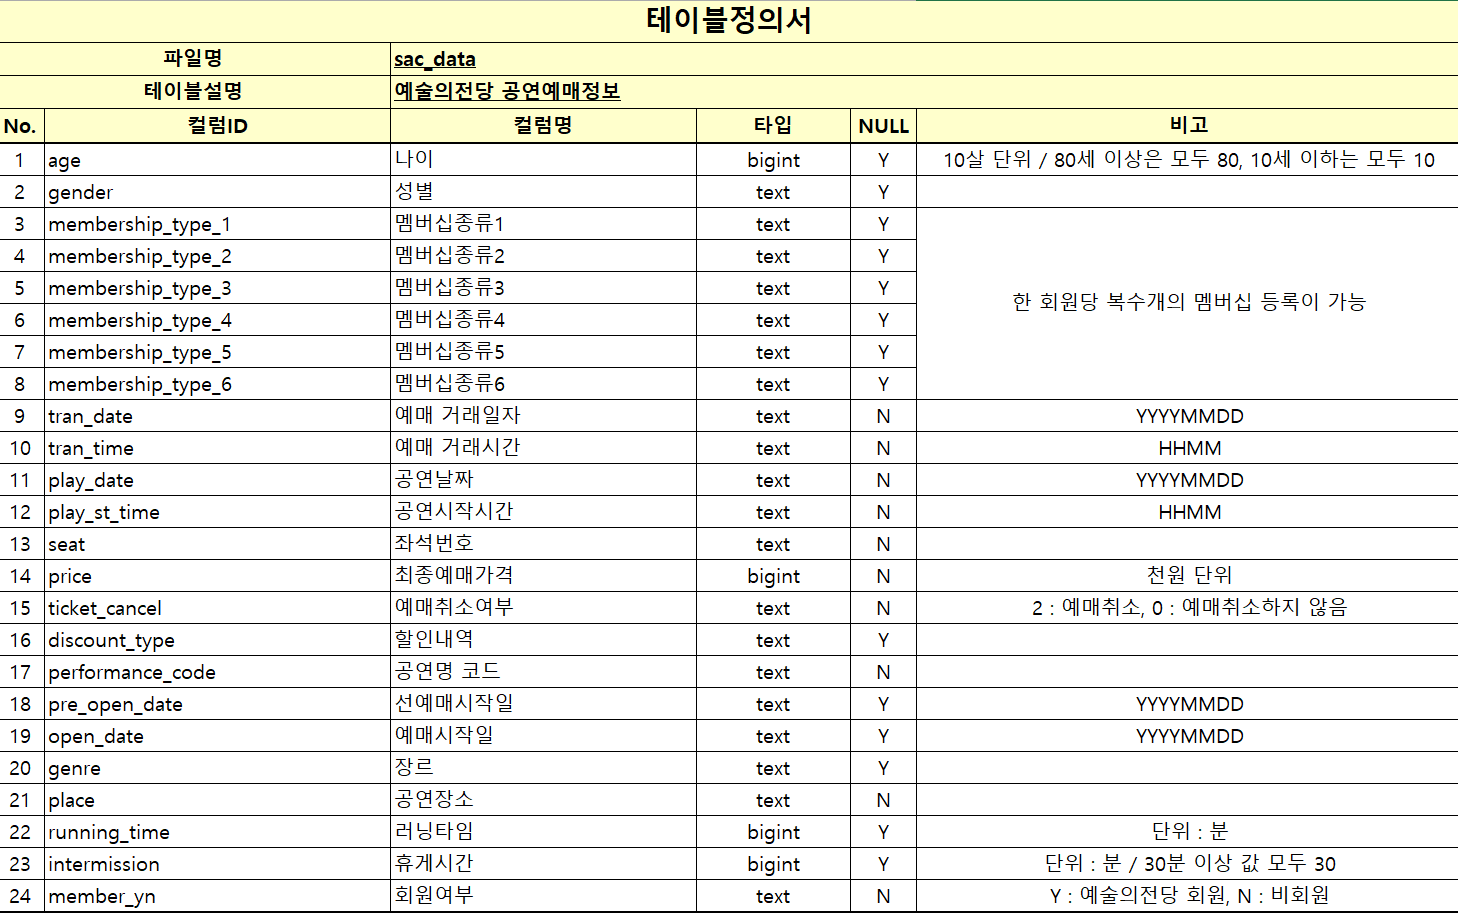

# 데이터 불러오기

## 데이터 불러오기

In [ ]:
import pandas as pd

data = pd.read_csv('2023빅콘테스트_어드밴스드리그_예술의전당.csv', encoding = 'UTF8')
opera = pd.DataFrame(data)

In [ ]:
opera.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,...,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,...,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,...,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


## 데이터 인포 및 결측치 확인

In [ ]:
opera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920868 entries, 0 to 1920867
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   membership_type_1  object 
 3   membership_type_2  object 
 4   membership_type_3  object 
 5   membership_type_4  object 
 6   membership_type_5  object 
 7   membership_type_6  float64
 8   tran_date          int64  
 9   tran_time          int64  
 10  play_date          int64  
 11  play_st_time       int64  
 12  seat               object 
 13  price              int64  
 14  ticket_cancel      int64  
 15  discount_type      object 
 16  performance_code   int64  
 17  pre_open_date      float64
 18  open_date          float64
 19  genre              object 
 20  place              object 
 21  running_time       int64  
 22  intermission       int64  
 23  member_yn          object 
dtypes: float64(4), int64(9), object(11)
memory usage: 

In [ ]:
opera.isnull().sum() #나이, 성별, 선예매 시작일, 장르

age                  1300183
gender               1299714
membership_type_1    1299714
membership_type_2    1433215
membership_type_3    1749009
membership_type_4    1890675
membership_type_5    1919586
membership_type_6    1920868
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         864385
open_date                340
genre                  25842
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

# 전처리

## 결측치가 많은 칼럼 제거

In [ ]:
opera.drop(columns=['age','gender','pre_open_date','membership_type_6'], inplace=True)

## 공연 날짜 데이터에서 연도와 월 추출

In [ ]:
opera['play_date'] = opera['play_date'].astype('str')

opera['play_date_year'] = opera['play_date'].str.slice(start=0, stop=4).astype(int)
opera['play_date_month'] = opera['play_date'].str.slice(start=4, stop=6).astype(int)

In [ ]:
print(opera[['play_date_year', 'play_date_month']])

         play_date_year  play_date_month
0                  2022                2
1                  2021               10
2                  2022               11
3                  2019                7
4                  2022                3
...                 ...              ...
1920863            2019                7
1920864            2023                4
1920865            2021                6
1920866            2021               11
1920867            2021                6

[1920868 rows x 2 columns]


In [ ]:
# 날짜 -> 연도, 계절 추출
# 시간 -> 오전, 오후 추출
# 장르?
# 공연 날짜와 거래 날짜간의 격차?
# 나이 성별 날리기
# 멤버십 갯수

## 할인 종류 정리

In [ ]:
opera['discount_type'].unique() # 할인 종류 정리

array(['일반', '초대권', '블루회원 할인20%', '골드회원 할인20%', '기획사',
       'K-lang 멤버십 회원(1인2매)20%', '기획사판매', '골드회원 할인30%', 'R석 기획사 할인',
       '싹틔우미 할인40%', '라흐마니노프탄생150주년(8매/3.27까지)20%', '공연진행석', '골드회원 할인10%',
       '장애인/국가유공자 할인50%', '싹딜가(골드)50%', '당일할인티켓', '그린회원 할인5%',
       '초,중,고,대학생(본인만)30%', '조기예매 할인40%', '그린회원 할인20%', '한화초대석',
       '단체100인이상50%', '공연예매권', '초/중/고등학생 할인(본인만)30%', '골드회원 할인15%',
       '골드회원 할인25%', '우리카드 우수회원', '조기예매 할인(1인8매/3월11일까지)30%', '신세계석',
       '골드회원 할인5%', '정기회원', '만65세 이상(본인만)50%', '싹딜가(블루)50%', '그린회원 할인15%',
       '직장인 할인(1인2매)20%', '블루회원 할인10%', '기획사판매20%',
       '초/중/고/대학생 할인(본인만)50%', '문화릴레이(1인2매/공연유료티켓제시)10%', '조기예매 할인10%',
       '노블회원 할인40%', 'K-Lang 할인(1인2매)20%', '골드회원 할인40%',
       '초/중/고등학생 할인(본인만)20%', '조기예매 할인(1인2매/~10월31일까지)30%', '기업석',
       '초/중/고/대학생 할인30%', '초/중/고/대학생 할인50%', '의사상자(동반1인/신분증지참)50%',
       '초,중,고,대학생(본인만)50%', '조기예매할인(1인8매/~6.30까지)30%', '그린회원 할인10%',
       '블루회원 할인5%', '연주자 할인50%', '스탭 할인30%', '홍보진행',
       'KOSYMI  유료회원(1

In [ ]:
# 할인 종류 내보내기

"""
discount_type = opera['discount_type'].unique()
discount_type_csv = pd.DataFrame(discount_type)

discount_type_csv.to_csv('할인 종류.csv', encoding = 'cp949')
"""

"\ndiscount_type = opera['discount_type'].unique()\ndiscount_type_csv = pd.DataFrame(discount_type)\n\ndiscount_type_csv.to_csv('할인 종류.csv', encoding = 'cp949')\n"

In [ ]:
opera['seat'].value_counts() # 층, 블록 나누기

1층 9열 1         1619
1층 12열 18       1380
2층 BOX1 1       1355
1층 B블록 10열 1    1329
1층 9열 4         1323
                ... 
1층 C블록22열 6       24
2층 A블록8열 12        8
2층 E블록8열 13        8
2층 A블록8열 13        8
2층 E블록8열 12        6
Name: seat, Length: 3525, dtype: int64

In [ ]:
opera['place'].value_counts() # 라벨링

콘서트홀      1096968
IBK챔버홀     477410
리사이틀홀      346490
Name: place, dtype: int64

In [ ]:
opera['performance_code'] # 문자화? 그냥?

0           302
1          1120
2          2283
3          2798
4           897
           ... 
1920863    1265
1920864     313
1920865     736
1920866    1920
1920867    1995
Name: performance_code, Length: 1920868, dtype: int64

In [ ]:
len(opera['performance_code'].unique())

2931

In [ ]:
opera['running_time'].value_counts()

120    541582
100    456111
90     434260
110    222499
80      57075
95      29248
105     29098
150     20620
85      18005
115     17032
130     16367
70      15451
140     12303
75      10197
0        7219
135      6511
15       4030
180      3303
60       2806
122      2208
65       1574
101      1439
240      1208
98       1168
145       988
111       865
170       761
71        738
300       595
125       591
113       519
210       447
62        436
112       386
96        374
81        371
83        362
109       349
82        327
94        303
86        276
92        243
79        217
350       153
77        122
270        77
61         54
Name: running_time, dtype: int64

In [ ]:
opera['member_yn'].isnull().sum()

0

In [ ]:
opera['intermission'].value_counts() # 30이상은 모두 30

15    1407163
20     269161
0      200796
10      33638
30       9928
25        182
Name: intermission, dtype: int64

In [ ]:
opera.groupby(['genre','intermission']).agg(g_i = ('intermission','count'))

g_i
genre intermission        
가족극   15               124
교향곡   0              69811
      10              5120
      15            384638
      20             82347
      30              5466
기타    0               2714
      15              2745
      30               993
독주    0              38154
      10              4485
      15            359302
      20             30659
      25               182
      30              1797
무용    15               155
복합장르  0               2035
      15              3739
      20              3642
성악    0               7276
      10              3526
      15             46229
      20             22584
      30               595
실내악   0              23036
      10             12163
      15            295677
      20              7939
      30               901
오페라   0               1232
      15             10405
      20             10976
재즈    0               1325
전시    15               266
콘서트   0               2124
      10               761
      15             13439
      20             10788
크로스오버 0                233
      10               568
      15              1410
클래식   0              36229
      10              3673
      15            193457
      20             72247
      30               176
합창    0              16506
      10              3342
      15             79289
      20             18546

*이탤릭체 텍스트*## 하나라도 결측치가 존재하는 행 제거

### genre

In [ ]:
opera = opera.dropna(subset=['genre'])

In [ ]:
opera['genre'].value_counts() # 데이터 개수 확인 넣을지 말지

교향곡      547382
독주       434579
실내악      339716
클래식      305782
합창       117683
성악        80210
콘서트       27112
오페라       22613
복합장르       9416
기타         6452
크로스오버      2211
재즈         1325
전시          266
무용          155
가족극         124
Name: genre, dtype: int64

In [ ]:
opera['ticket_cancel'].value_counts() # 가격

0    1581446
2     313580
Name: ticket_cancel, dtype: int64

### open_date

In [ ]:
opera = opera.dropna(subset=['open_date'])

In [ ]:
opera.isnull().sum()

membership_type_1    1284772
membership_type_2    1415405
membership_type_3    1725425
membership_type_4    1864875
membership_type_5    1893414
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
open_date                  0
genre                      0
place                      0
running_time               0
intermission               0
member_yn                  0
play_date_year             0
play_date_month            0
dtype: int64

In [ ]:
opera.loc[opera['intermission'] == 0, ['genre']].value_counts()

genre
교향곡      69811
독주       37814
클래식      36229
실내악      23036
합창       16506
성악        7276
기타        2714
콘서트       2124
복합장르      2035
재즈        1325
오페라       1232
크로스오버      233
dtype: int64

# 범주형 시각화

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

## member_yn

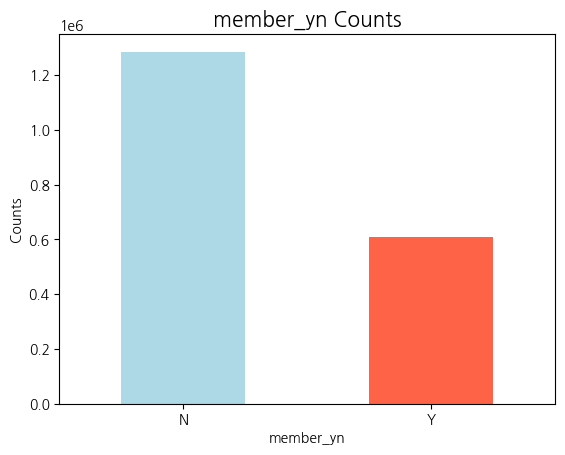

In [ ]:
plt.title('member_yn Counts' , fontsize=15)
plt.ylabel('Counts' )
plt.xlabel('member_yn' )

opera['member_yn'].value_counts().plot.bar(color = ['lightblue', 'tomato'])

plt.xticks(rotation=0)

plt.show()

## genre

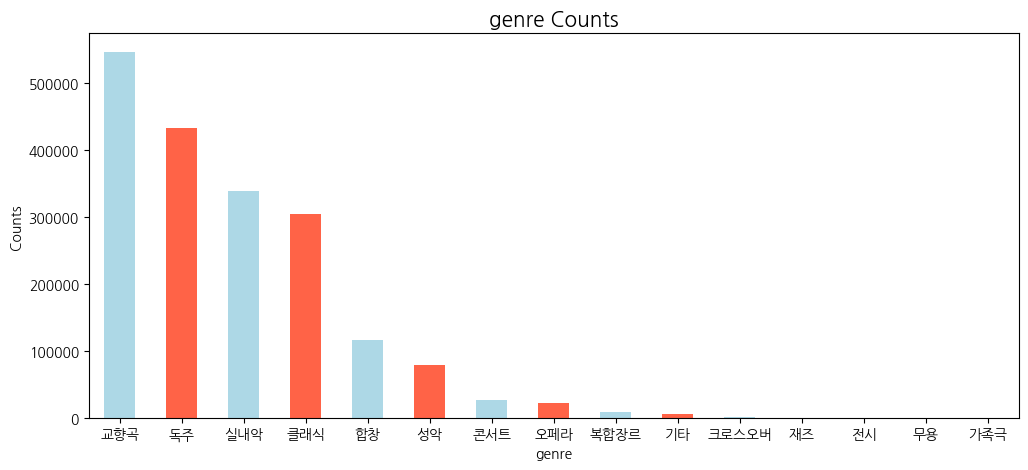

In [ ]:
plt.figure(figsize=(12,5))

plt.title('genre Counts' , fontsize=15)

plt.ylabel('Counts')
plt.xlabel('genre')

opera['genre'].value_counts().plot.bar(color = ['lightblue', 'tomato'])
plt.xticks(rotation=0)

plt.show()

In [ ]:
opera['genre'].value_counts()

교향곡      547382
독주       434239
실내악      339716
클래식      305782
합창       117683
성악        80210
콘서트       27112
오페라       22613
복합장르       9416
기타         6452
크로스오버      2211
재즈         1325
전시          266
무용          155
가족극         124
Name: genre, dtype: int64

## ticket_cancel

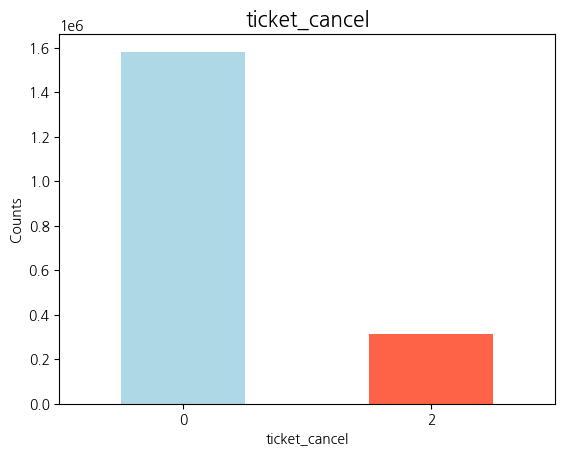

In [ ]:
plt.title('ticket_cancel' , fontsize=15)
plt.ylabel('Counts' )
plt.xlabel('ticket_cancel' )

opera['ticket_cancel'].value_counts().plot.bar(color = ['lightblue', 'tomato'])
plt.xticks(rotation=0)

plt.show()

# 0 : 예매 취소 X / 2 : 예매 취소

## place

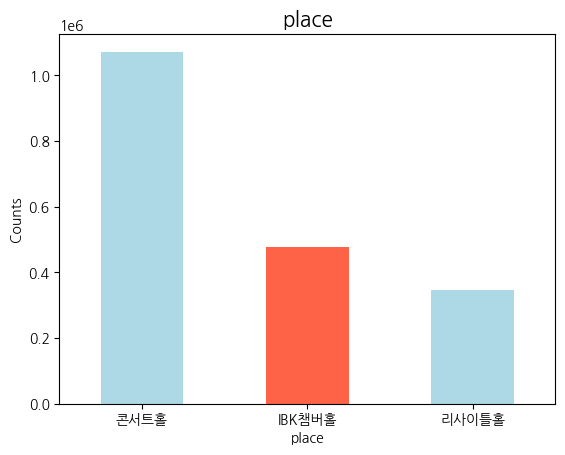

In [ ]:
plt.title('place' , fontsize=15)
plt.ylabel('Counts' )
plt.xlabel('place' )

opera['place'].value_counts().plot.bar(color = ['lightblue', 'tomato'])
plt.xticks(rotation=0)

plt.show()

# 시각화

## price

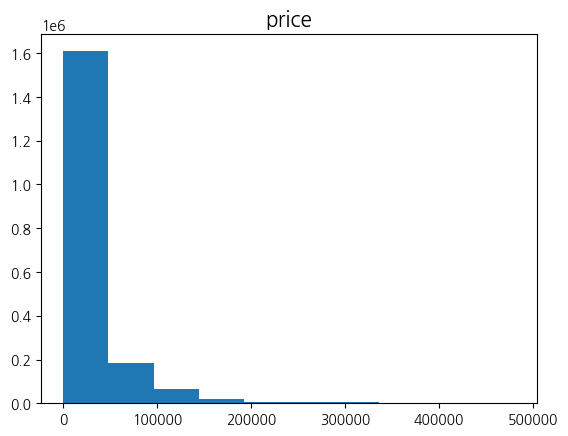

In [ ]:
plt.title('price', fontsize=15)

plt.hist(opera['price']) # 0원이 너무 많음
plt.show()

In [ ]:
opera_p = opera.loc[opera['price'] != 0, ['price']]

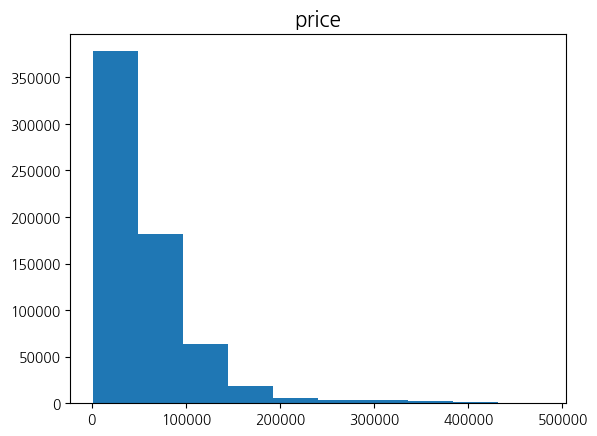

In [ ]:
plt.title('price', fontsize=15) # 정규화 필요

plt.hist(opera_p)
plt.show()

In [ ]:
a = opera['discount_type'].unique()
alist = []
blist = []
for i,v in enumerate(a):
    if '초대' in v: alist.append(v)
for i,v in enumerate(a):
    if v not in alist:
        if '%' not in v: blist.append(v)
blist

In [ ]:
opera.to_csv('opera.csv', index = None)

In [ ]:
opera.isnull().sum()

membership_type_1    1284772
membership_type_2    1415405
membership_type_3    1725425
membership_type_4    1864875
membership_type_5    1893414
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
open_date                  0
genre                      0
place                      0
running_time               0
intermission               0
member_yn                  0
play_date_year             0
play_date_month            0
dtype: int64